In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading dataset
df=pd.read_csv('titanic_dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 12)

####891 rows and 12 columns

###Checking for null values

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

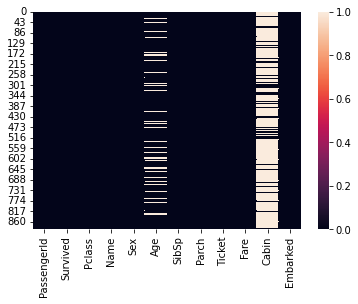

In [8]:
sns.heatmap(df.isnull());#plotting heatmap of null values present in the dataset 

###Null values are present in Age,Cabin and Embarked columns

In [9]:
df.isnull().sum()*100/len(df)#percentage of null values

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

###The percentage of null values in Cabin column is 77.1%(ie more than 50%) and in Age column is 19.865% and in Embarked column is 0.22%.

#Handling Null values

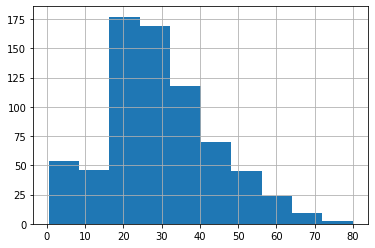

In [10]:
#checking the distribution of Age columns
df['Age'].hist();

###From the above plotted histogram of Age column we can infer tha it is slightly right skewed,so median can be used to fill null values.

In [11]:
df['Age'].fillna(df['Age'].median(),inplace=True)#filling null values in Age column with respective median value

In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)#Emabrked column is categorical ,so null values in Embarked column can be replaced using respective mode

In [13]:
df[['Age','Embarked']].isnull().sum()#checking for null values presence after filling the null values

Age         0
Embarked    0
dtype: int64

###Checking of dulpicated rows

In [14]:
df[df.duplicated(subset='Ticket',keep='first')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


###Ticket no is duplicated for 210 rows.

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
df[['PassengerId','Name','Ticket']].nunique()#checking for unique values in dataset

PassengerId    891
Name           891
Ticket         681
dtype: int64

###a) PassengerId, Name and Ticket columns contains only  unique values ,so those columns can be dropped.

###b) Cabin column contains null  of  about 77%,so Cabin column can also  be dropped.

In [17]:
df1=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)#droping PassengerId,Name,Ticket and Cabin columns

In [18]:
df1.head(3)#df1 is the new dataframe

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


#Checking for Correlation

In [19]:
corr=df1.corr()

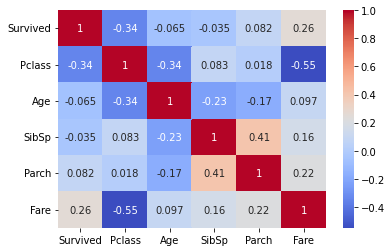

In [20]:
#plotting df1.corr() using heatmap
sns.heatmap(corr,cmap='coolwarm',annot=True);

###1.There is negative correlation  value of  0.55 between Pclass and Fare columns.

###2.There is positive correlation  value of  0.41 between SibSp and Parch columns.


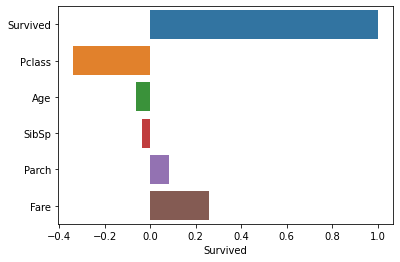

In [21]:
sns.barplot(x=corr.Survived,y=corr.columns);#Barplot of correlation of survived column with other columns

####Survived column is negatively correlated with Pclass ,Age, Sibsp and positively correlated with Parch and Fare columns.But there is no highly positive or negative correlations with any of these  columns.

#Outlier checking(using boxplot)

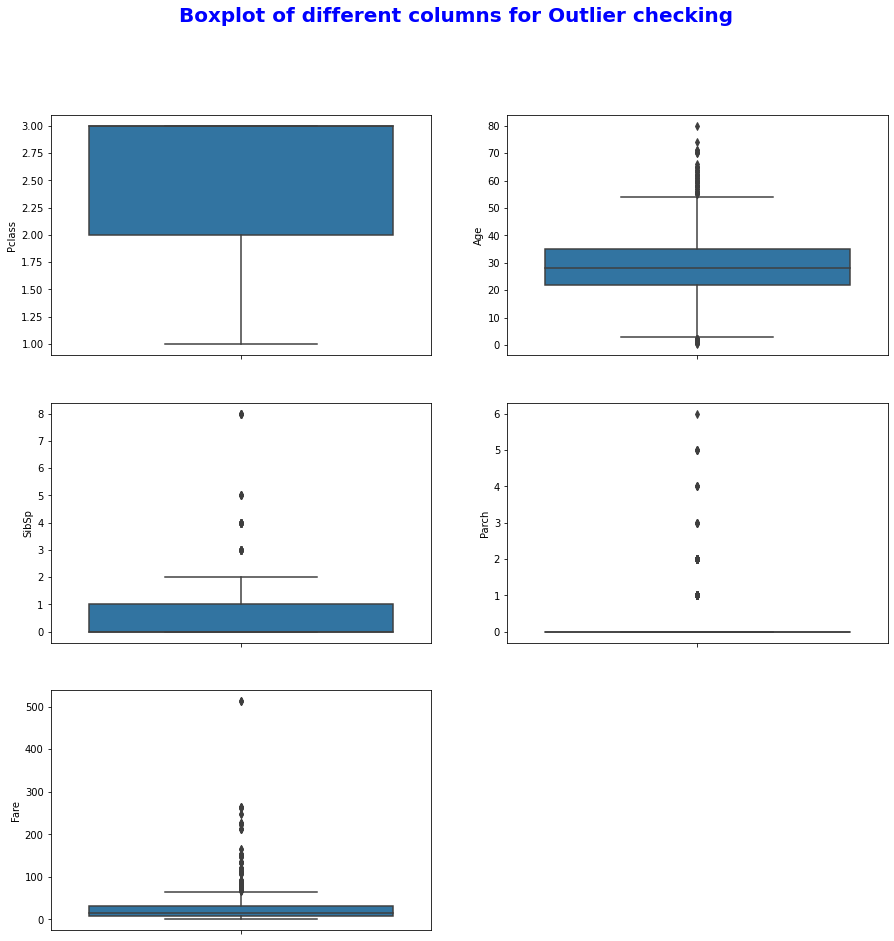

In [22]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.boxplot(data=df1,y='Pclass')
plt.subplot(3,2,2)
sns.boxplot(data=df1,y='Age')
plt.subplot(3,2,3)
sns.boxplot(data=df1,y='SibSp')
plt.subplot(3,2,4)
sns.boxplot(data=df1,y='Parch')
plt.subplot(3,2,5)
sns.boxplot(data=df1,y='Fare')
plt.suptitle('Boxplot of different columns for Outlier checking',fontsize=20,fontweight='bold',color='b');

#One Hot Encoding

In [23]:
df1=pd.get_dummies(df1)

In [24]:
df1.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1


#The target column Survived is categorical, so Classification algorithms are used for building models.

#1.KNN (Lazy Learning Algorithm) Model

In [25]:
x=df1.drop('Survived',axis=1)#x contains the independent variables
y=df1['Survived']#y is the target or dependent variable

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)#Hold Out method

In [28]:
from sklearn.neighbors import KNeighborsClassifier#importing knn classifier
metric_knn=[]#empty list for appending accuracy of model for each k values
n_neighbors=np.arange(3,15)#k value from 3 to 14

In [29]:
#for classification algorithm models for validation checking confusion matrix,accuracy score,precision score and recall score can be used
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [30]:
for k in n_neighbors:#for loop for looping through each k values
 knn_clf=KNeighborsClassifier(n_neighbors=k)#creating an instance of knn classifier
 model_knn=knn_clf.fit(x_train,y_train)#model creation
 y_pred_knn=model_knn.predict(x_test)#predicting using xtest
 acc=accuracy_score(y_test,y_pred_knn)#accuracy calculations
 metric_knn.append(acc)#appending accuracy of model for each k values

In [31]:
metric_knn#printing the accuracy score values array

[0.7130044843049327,
 0.695067264573991,
 0.7040358744394619,
 0.7219730941704036,
 0.7174887892376681,
 0.7130044843049327,
 0.7085201793721974,
 0.7130044843049327,
 0.7130044843049327,
 0.6995515695067265,
 0.695067264573991,
 0.6995515695067265]

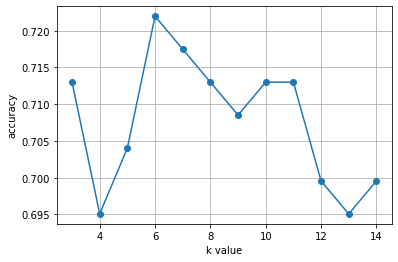

In [32]:
#Ploting line graph of accuracy of model for each value of k 
plt.plot(n_neighbors,metric_knn,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

###From the above plotte k value vs accuracy plot we can infer that maximum accuracy of 72.19% is for k value=6

In [33]:
#accuracy is more for k=6,so creating model using k=6
knn_clf=KNeighborsClassifier(n_neighbors=6)
model_knn=knn_clf.fit(x_train,y_train)
y_pred_knn=model_knn.predict(x_test)

In [34]:
print(confusion_matrix(y_test,y_pred_knn))#confusion matrix is used for checking the accuracy ,precision etc

[[116  18]
 [ 44  45]]


In [35]:

print(accuracy_score(y_test,y_pred_knn))#accuracy score

0.7219730941704036


In [36]:

print(precision_score(y_test,y_pred_knn))#precision score=the number of correct positive predictions made.

0.7142857142857143


In [37]:
print(recall_score(y_test,y_pred_knn))#recall score=count of true positives in a correct manner out of all the actual positive values.

0.5056179775280899


In [38]:
print(f1_score(y_test,y_pred_knn))#f1_score

0.5921052631578948


#a) K Fold Cross Validation of KNN Model

In [39]:
from sklearn.model_selection import KFold#importing K-Folds cross-validator

In [40]:
kfold_validator_knn=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold. 

In [ ]:
for train_index,test_index in kfold_validator_knn.split(x,y):
  print('Training Index',train_index)
  print('Testing Index',test_index)

In [42]:
from sklearn.model_selection import cross_val_score# cross_val_score evaluate a score by cross-validation.

In [43]:
cv_result_knn=cross_val_score(model_knn,x,y,cv=kfold_validator_knn)#calculating the k fold cross validation scores

In [44]:
cv_result_knn#k fold cross validation scores

array([0.76666667, 0.69662921, 0.6741573 , 0.74157303, 0.66292135,
       0.69662921, 0.69662921, 0.70786517, 0.70786517, 0.78651685])

In [45]:
np.mean(cv_result_knn)#mean of k fold cross validation scores

0.7137453183520599

#b) Stratified K Fold Cross Validation of KNN Model

In [46]:
from sklearn.model_selection import StratifiedKFold#importing Stratified K-Folds cross-validator.

In [47]:
skfold_validator=StratifiedKFold(n_splits=10)#no of folds=10

In [ ]:
for train_index,test_index in skfold_validator.split(x,y):
  print('Training Index',train_index)
  print('Testing Index',test_index)

In [49]:
skcv_result_knn=cross_val_score(model_knn,x,y,cv=skfold_validator)# cross_val_score evaluate a score by cross-validation.

In [50]:
skcv_result_knn#stratified k fold cross validation scores

array([0.61111111, 0.70786517, 0.69662921, 0.76404494, 0.74157303,
       0.68539326, 0.76404494, 0.71910112, 0.69662921, 0.75280899])

In [51]:
np.mean(skcv_result_knn)#mean of stratified k fold cross validation scores

0.7139200998751561

#2.SVM(Support Vector Machine) Model

In [52]:
from sklearn.svm import SVC#support vector classifier

In [53]:
svm_clf=SVC(kernel='rbf')#kernel choosen is rbf(default)

In [54]:
svm_model=svm_clf.fit(x_train,y_train)#Hold Out method

In [55]:
y_pred_svm=svm_model.predict(x_test)

In [56]:
confusion_matrix(y_test,y_pred_svm)#confusion matrix of svm model

array([[125,   9],
       [ 66,  23]])

In [57]:
accuracy_score(y_test,y_pred_svm)#accuracy score 

0.6636771300448431

In [58]:
precision_score(y_test,y_pred_svm)#precision score

0.71875

In [59]:
recall_score(y_test,y_pred_svm)#recall score

0.25842696629213485

In [60]:
f1_score(y_test,y_pred_svm)#f1 score

0.3801652892561984

#a) K FOLD Cross Validation of SVM Model

In [61]:
kfold_validator_svm=KFold(10,shuffle=True,random_state=42)#no of folds=10,shuffle =True to avoid fit failed warning  error ,random_state=42 to control the randomness of each fold. 

In [ ]:
for train_index,test_index in kfold_validator_svm.split(x,y):
  print('Training Index',train_index)
  print('Testing Index',test_index)

In [63]:
cv_result_svm=cross_val_score(svm_model,x,y,cv=kfold_validator_svm)

In [64]:
cv_result_svm#k fold cross validation scores

array([0.7       , 0.62921348, 0.6741573 , 0.75280899, 0.6741573 ,
       0.68539326, 0.65168539, 0.64044944, 0.61797753, 0.76404494])

In [65]:
np.mean(cv_result_svm)#mean of k fold cross validation scores

0.6789887640449439

#b) Stratified K Fold Cross Validation of SVM Model

In [66]:
skfold_validator_svm=StratifiedKFold(n_splits=10)#no of folds=10

In [ ]:
for train_index,test_index in skfold_validator_svm.split(x,y):
  print('Training Index',train_index)
  print('Testing Index',test_index)

In [68]:
skcv_result_svm=cross_val_score(svm_model,x,y,cv=skfold_validator_svm)

In [69]:
skcv_result_svm#stratified k fold cross validation scores

array([0.62222222, 0.58426966, 0.68539326, 0.74157303, 0.69662921,
       0.69662921, 0.68539326, 0.71910112, 0.70786517, 0.6741573 ])

In [70]:
np.mean(skcv_result_svm)#mean of stratified k fold cross validation scores

0.6813233458177278

#Conclusion:-

In [71]:
print('THE AVERAGE K FOLD CROSS VALIDATION SCORE OF KNN MODEL IS:',np.mean(cv_result_knn))
print('\n')
print('THE AVERAGE K FOLD CROSS VALIDATION SCORE OF SVM MODEL IS:',np.mean(cv_result_svm))
print('\n')
print('THE AVERAGE STRATIFIED CROSS VALIDATION SCORE OF KNN MODEL IS:',np.mean(skcv_result_knn))
print('\n')
print('THE AVERAGE STRATIFIED CROSS VALIDATION SCORE OF SVM MODEL IS:',np.mean(skcv_result_svm))

THE AVERAGE K FOLD CROSS VALIDATION SCORE OF KNN MODEL IS: 0.7137453183520599


THE AVERAGE K FOLD CROSS VALIDATION SCORE OF SVM MODEL IS: 0.6789887640449439


THE AVERAGE STRATIFIED CROSS VALIDATION SCORE OF KNN MODEL IS: 0.7139200998751561


THE AVERAGE STRATIFIED CROSS VALIDATION SCORE OF SVM MODEL IS: 0.6813233458177278


### a) Both the averages of  K Fold Cross Validation Scores and Stratified Cross Validation Scores of KNN model are more than SVM Model scores.

###b) So KNN Model performed better than SVM Model on Titanic Dataset.
